In [170]:
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
import scipy as spy
import keras
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout,Input
from keras.optimizers import Adam,RMSprop
df = pd.read_csv('winequality-white.csv')

Olhando abaixo, não temos nenhum valor N/A, então não precisamos tratar isso.

In [173]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [174]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [175]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

Podemos ver abaixo que existem muitos outliers, não só nessa coluna, mas em várias outras.Vou tentar usar um método para remover os outliers dessa, depois tento remover os das restantes com o mesmo método.

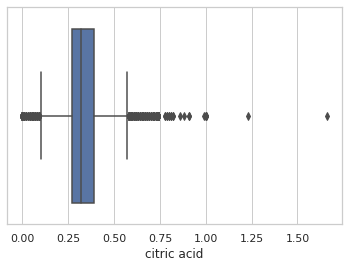

In [176]:
sb.set_theme(style="whitegrid")
ax = sb.boxplot(x=df['citric acid'])

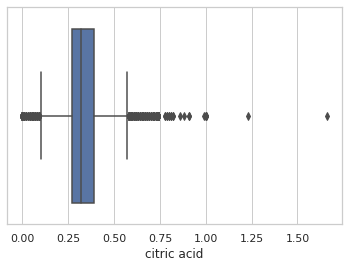

In [177]:
ax = sb.boxplot(x=df['citric acid'])

In [178]:
#spy.stats.zscore(df)
cols = list(df.columns)
df[cols]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Para calcular o zscore, eu vou ter que tirar as colunas que não são valores float, como a "type" e a "quality" e setar a política de nan para omitir. eu também quero substituir as strings de 'white' para 0 e de 'red'para 1

Os outliers são definidos como os valores que estão acima de 3 desvios padrões da média. Logo abaixo eu removo eles

In [179]:
zscores = spy.stats.zscore(df[cols], nan_policy='omit')
abs_zscores = np.abs(zscores)
filtered_entries = (abs_zscores < 3).all(axis=1)
new_df = df[filtered_entries]
df = new_df
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [180]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

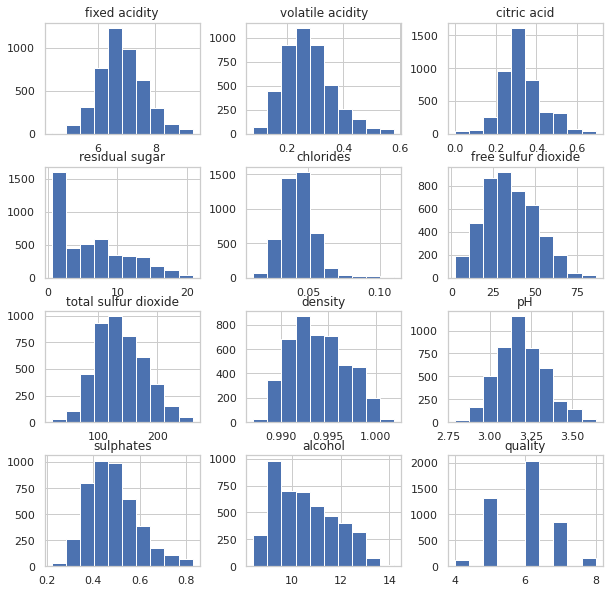

In [181]:
df.hist(figsize = (10, 10));

Vamos adicionar mais uma coluna chamada `level`no dataset, que vai representar o nível de qualidade do vinho, assim como está no artigo. Se a o campo na coluna `quality` for <= 5 a qualidade é baixa, se for entre > 5 e < 7 a qualidade é regular e se for >= 7 a qualidade é alta:

In [182]:
def create_level(x):
    # function to create levels basis wine quality
    if x <= 5:
        x = "baixa"
    elif x > 5 and x < 7:
        x = "regular"
    else:
        x = "alta"
    return x
df['level'] = df['quality'].apply(lambda x: create_level(x))
df

/tmp/ipykernel_6695/762177424.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['level'] = df['quality'].apply(lambda x: create_level(x))


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,level
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,regular
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,regular
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,regular
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,regular
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,regular
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,baixa
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,regular
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,alta


Também quero codificar essas qualidades numericamente:

In [183]:
from sklearn.preprocessing import LabelEncoder
LB = LabelEncoder()
LB_encoded = LB.fit_transform(df['level'])
print((LB.classes_))
print(LB_encoded)


['alta' 'baixa' 'regular']
[2 2 2 ... 2 0 2]


<AxesSubplot:xlabel='pH'>

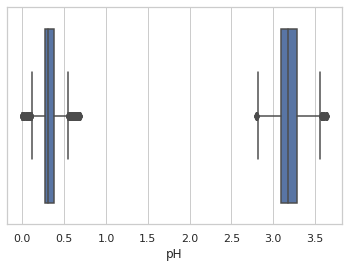

In [184]:
ax = sb.boxplot(x=df['citric acid'])
sb.boxplot(x=df['pH'])

In [190]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:10],LB_encoded,test_size=0.20,random_state=21)
print('Shape of Training Xs:{}'.format(x_train.shape))
print('Shape of Test Xs:{}'.format(x_test.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_test.shape))

df.iloc[:, :10]

Shape of Training Xs:(3589, 10)
Shape of Test Xs:(898, 10)
Shape of Training y:(3589,)
Shape of Test y:(898,)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40
...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38


In [134]:
x_train

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4490,white,5.8,0.300,0.33,3.5,0.033,25.0,116.0,0.99057,3.20,0.44,11.7
1767,white,7.4,0.320,0.22,1.7,0.051,50.0,179.0,0.99550,3.28,0.69,8.9
5659,red,9.3,0.655,0.26,2.0,0.096,5.0,35.0,0.99738,3.25,0.42,9.6
31,white,8.3,0.140,0.34,1.1,0.042,7.0,47.0,0.99340,3.47,0.40,10.2
3478,white,6.2,0.360,0.45,10.4,0.060,22.0,184.0,0.99711,3.31,0.56,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...
5183,red,9.9,0.590,0.07,3.4,0.102,32.0,71.0,1.00015,3.31,0.71,9.8
1251,white,5.7,0.245,0.33,1.1,0.049,28.0,150.0,0.99270,3.13,0.42,9.3
55,white,6.9,0.250,0.35,1.3,0.039,29.0,191.0,0.99080,3.13,0.52,11.0
849,white,6.0,0.200,0.24,1.8,0.030,30.0,105.0,0.99090,3.31,0.47,11.5


AttributeError: 'DataFrame' object has no attribute 'col'

Separando o dataset em dados de treinamento e teste

In [127]:
X =  np.asarray(df.drop(columns=["type", "quality","level"])).astype('float32') 
y = np.asarray(df['type']).astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True)


# Verificando o formato para passar na input layer


ValueError: could not convert string to float: 'white'

In [78]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=11, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [22]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=50, batch_size=10)

2021-08-10 11:18:05.421376: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-10 11:18:05.525494: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 1999965000 Hz


Epoch 1/50
451/451 [==============================] - 19s 4ms/step - loss: 1.2211 - accuracy: 0.8070 - val_loss: 0.2240 - val_accuracy: 0.9255
Epoch 2/50
451/451 [==============================] - 1s 2ms/step - loss: 0.1970 - accuracy: 0.9350 - val_loss: 0.2151 - val_accuracy: 0.9295
Epoch 3/50
451/451 [==============================] - 1s 2ms/step - loss: 0.1909 - accuracy: 0.9370 - val_loss: 0.2160 - val_accuracy: 0.9301
Epoch 4/50
451/451 [==============================] - 1s 2ms/step - loss: 0.1783 - accuracy: 0.9443 - val_loss: 0.2042 - val_accuracy: 0.9321
Epoch 5/50
451/451 [==============================] - 1s 2ms/step - loss: 0.1741 - accuracy: 0.9443 - val_loss: 0.1897 - val_accuracy: 0.9355
Epoch 6/50
451/451 [==============================] - 1s 2ms/step - loss: 0.1592 - accuracy: 0.9482 - val_loss: 0.2046 - val_accuracy: 0.9335
Epoch 7/50
451/451 [==============================] - 1s 2ms/step - loss: 0.1491 - accuracy: 0.9500 - val_loss: 0.1679 - val_accuracy: 0.9434
Epoch

<h2>avaliação do resultado: </h2>

In [57]:
mse_value, mae_value = model.evaluate(X_test, y_test, verbose=0)
print(mse_value)
y_pred = model.predict(X_test)

0.07173952460289001


In [58]:
#R2 score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9072634707203403

In [59]:
model.score(x_test,y_test)

AttributeError: 'Sequential' object has no attribute 'score'